In [6]:
import torch
from torch import nn
from torch.utils.data import DataLoader, Dataset
from torchvision import datasets
from torchvision.io import read_image
import torchvision.transforms
from google.colab.patches import cv2_imshow

# Operations on Image using NumPy

In [7]:
# importing necessary libraries
import numpy as np
import cv2 as cv
import os

In [8]:
# reading an image as numpy array
img_rgb = cv.imread('/content/cat.jpg')
img_gray = cv.imread('/content/cat.jpg', 0)

In [9]:
def brightness(img, amount):
  '''
    changes brightness of an image by the paramter amount
  '''

  if (amount > 1.5 or amount < 0):
    assert('amount should be in range [0, 1.5]')

  image = img * amount

  return image


def contrast(img, amount):
  '''
    change the contrast of an image
  '''

  if (amount > 1.5 or amount < -1.5):
    assert('amount should be in range [-1.5, 1.5]')

  image = ((img - np.mean(img)) * amount) + np.mean(img)


  return image

def noise(img, amount):
  '''
    adds noise to an image by the paramter amount, maximum amount is 100
  '''

  assert('amount must be less than or equal to 100')

  image = np.random.normal(scale=amount, size=img.shape) + img

  return image


def binarize(img, threshold=128):
  '''
    binarize an image with a threshold value
  '''

  image = np.where(img < threshold, 0, 255)

  return image


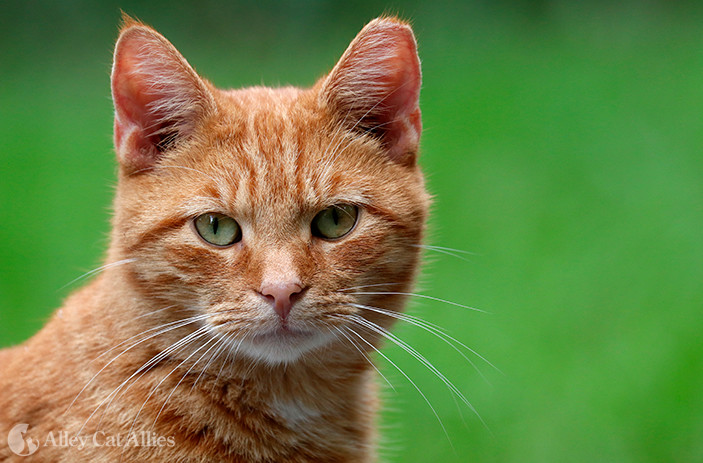

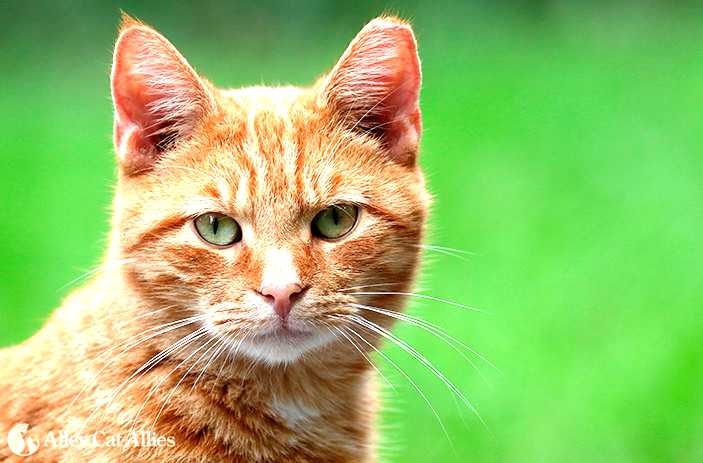

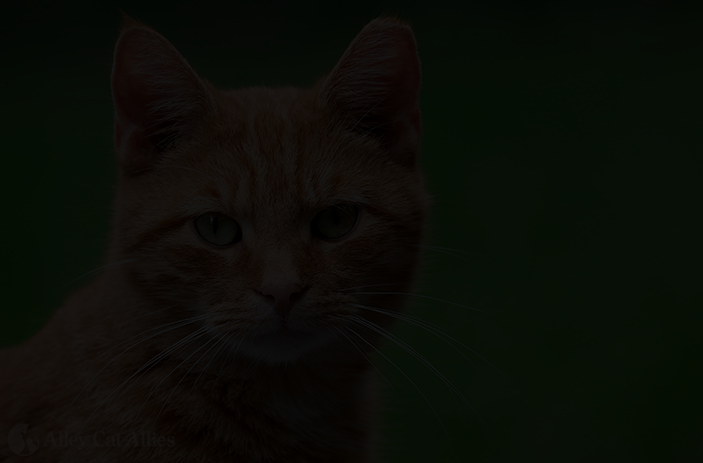

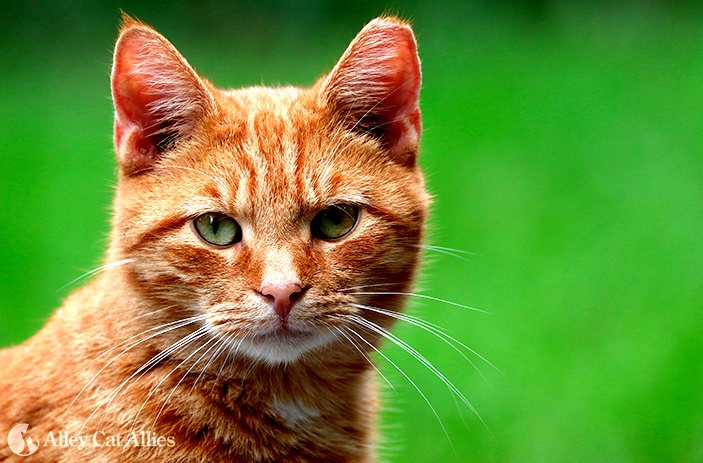

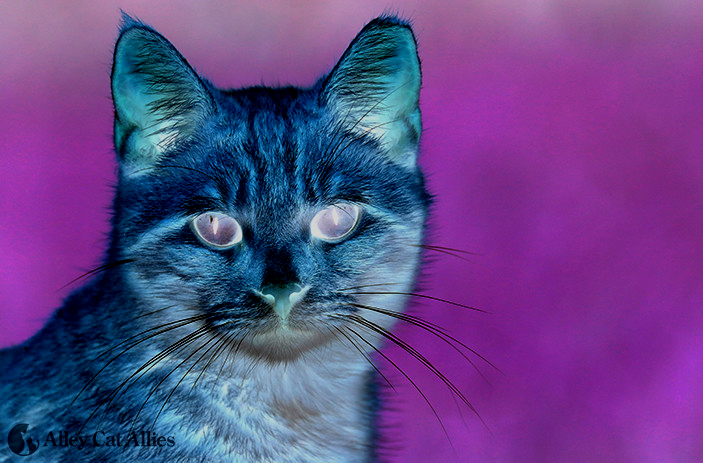

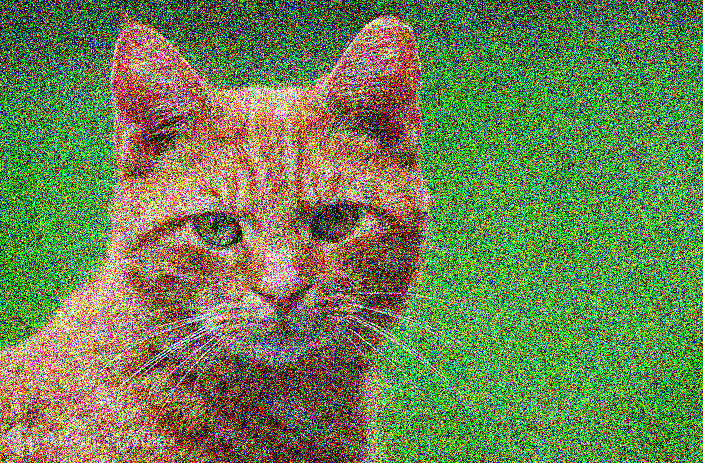

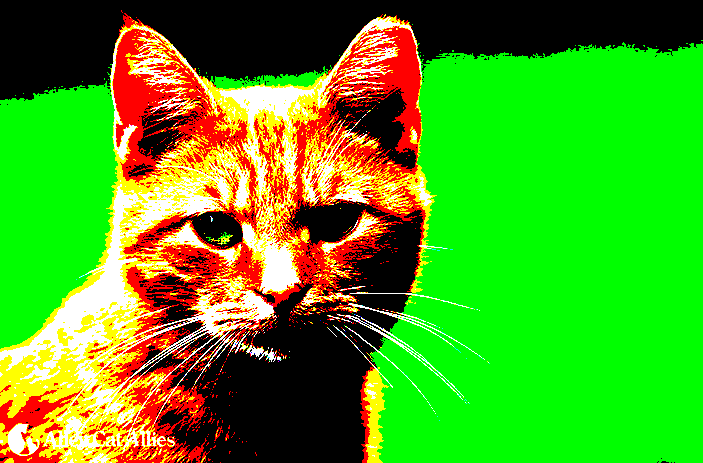

In [10]:
# original image
cv2_imshow(img_rgb)

#high brightness
img_rgb_bh = brightness(img_rgb, 1.5)
cv2_imshow(img_rgb_bh)

# less brightness
img_rgb_bl = brightness(img_rgb, 0.1)
cv2_imshow(img_rgb_bl)

# high contrast image
img_rgb_c = contrast(img_rgb, 1.5)
cv2_imshow(img_rgb_c)

# negative contrast image
img_rgb_c = contrast(img_rgb, -1.1)
cv2_imshow(img_rgb_c)

#noise in image
img_rgb_noise = noise(img_rgb, 100)
cv2_imshow(img_rgb_noise)

#binarization in image
img_rgb_bin = binarize(img_rgb, 128)
cv2_imshow(img_rgb_bin)

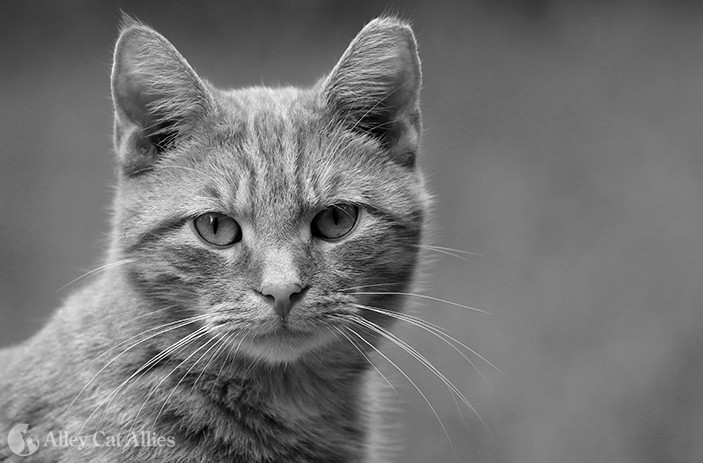

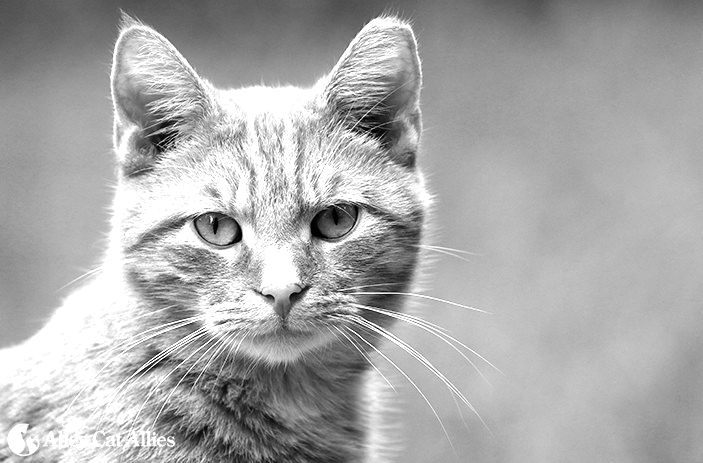

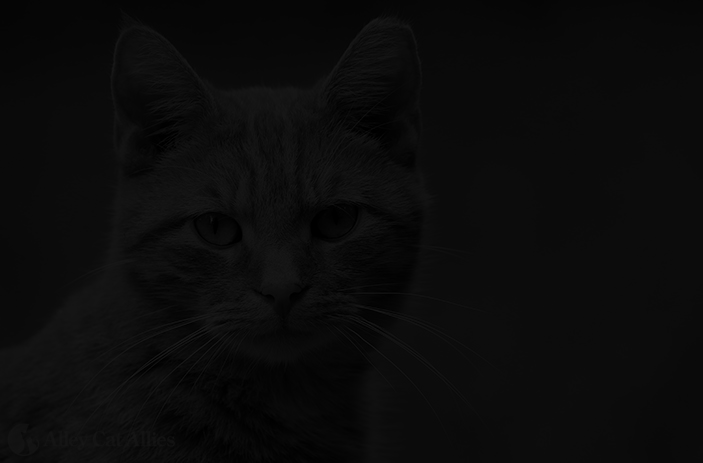

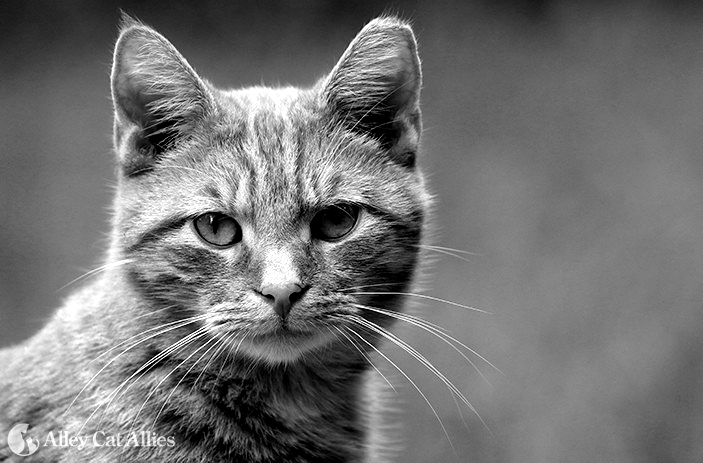

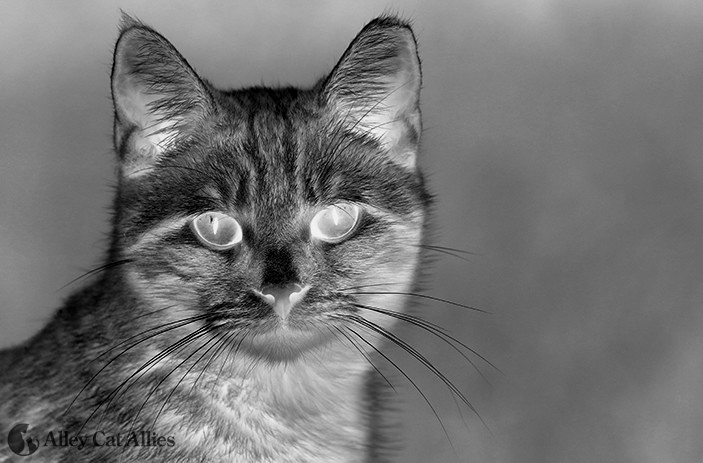

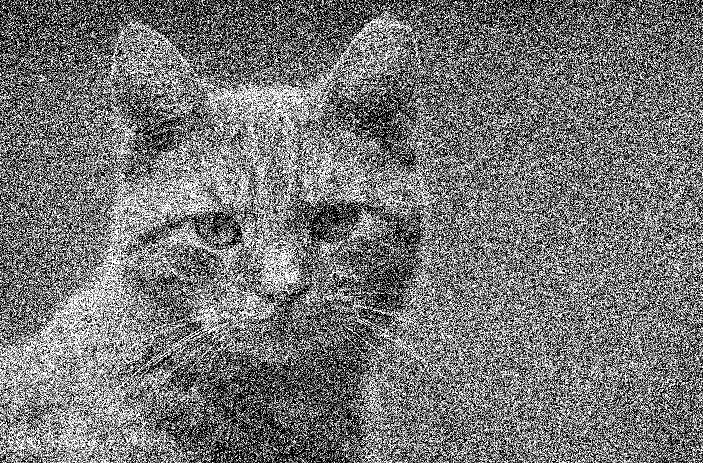

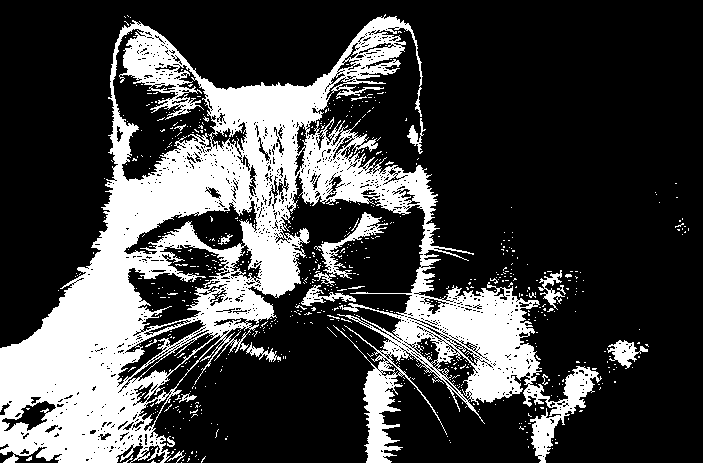

In [11]:
# original image
cv2_imshow(img_gray)

#high brightness
img_gray_bh = brightness(img_gray, 1.5)
cv2_imshow(img_gray_bh)

# less brightness
img_gray_bl = brightness(img_gray, 0.1)
cv2_imshow(img_gray_bl)

# high contrast image
img_gray_c = contrast(img_gray, 1.5)
cv2_imshow(img_gray_c)

# negative contrast image
img_gray_c = contrast(img_gray, -1.1)
cv2_imshow(img_gray_c)

#noise in image
img_gray_noise = noise(img_gray, 100)
cv2_imshow(img_gray_noise)

#binarization in image
img_gray_bin = binarize(img_gray, 128)
cv2_imshow(img_gray_bin)

# Convolutional operations

In [64]:
def convolution(img, kernel=None):
  '''
    convolution operation for applying a kernel on image
  '''

  if(kernel is None):
    assert('Pass the kernel')

  kernel_size = kernel.shape[0]

  img_h, img_w, img_c = img.shape

  padding = (kernel_size - 1) // 2

  out_h, out_w, out_c = img_h + (2 * padding), img_w + (2 * padding), img_c

  padded_img = np.zeros(shape=(out_h, out_w, out_c))
  output_img = np.zeros(shape=(img_h, img_w, img_c))

  for i in range(img_h):
    for j in range(img_w):
      padded_img[(i + padding), (j + padding), :] = padded_img[(i + padding), (j + padding), :] + img[i, j]

  for i in range(img_h):
    for j in range(img_w):
      for k in range(img_c):
        output_img[i, j, k] = np.sum(padded_img[i:(i + kernel_size), j:(j + kernel_size), k] * kernel)

  return output_img

In [65]:
def get_gaussian_kernel(ksize=3, sigma=1.0):
  '''
    returns a gaussian kernel of shape (ksize, ksize)
  '''
  ksize = 5

  sigma = 1.0

  kernel = cv.getGaussianKernel(ksize, sigma)

  kernel = np.outer(kernel, kernel.transpose())

  kernel = kernel / np.sum(kernel)

  return kernel

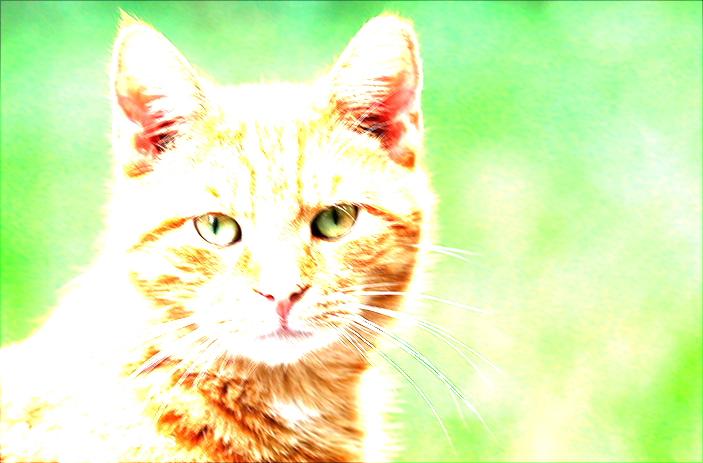

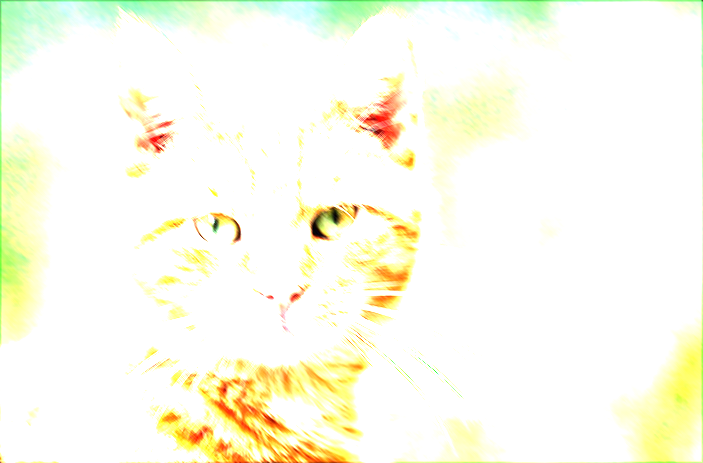

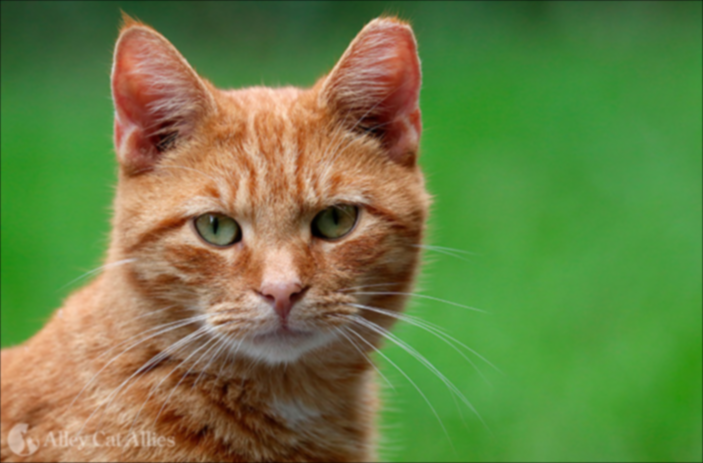

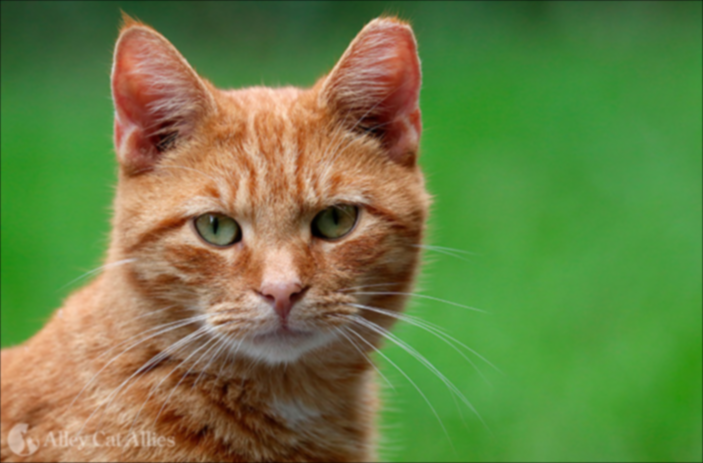

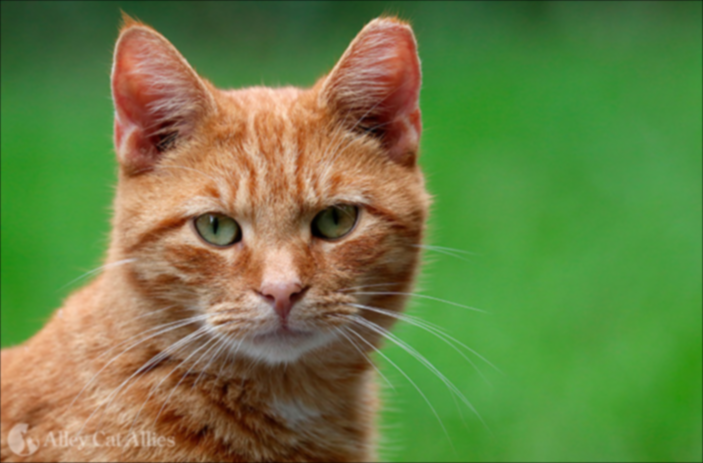

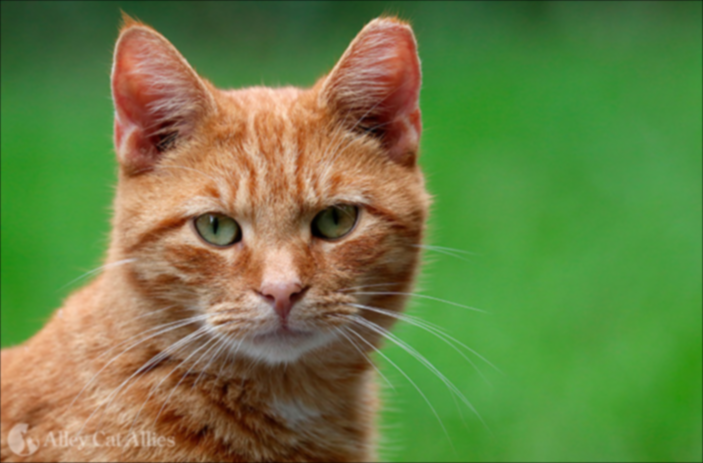

In [78]:
img_ = cv.imread('/content/cat.jpg')

# Kernel of size 5 with ones on diagnol
kernel = np.eye(3, 3)
cv2_imshow((convolution(img_, kernel)))

# Kernel of size 5 with ones on diagnol
kernel = np.eye(5, 5)
cv2_imshow((convolution(img_, kernel)))

# Gaussian blur of kernel size 3
kernel = get_gaussian_kernel(3)
cv2_imshow((convolution(img_, kernel)))

# Gaussian blur of kernel size 5
kernel = get_gaussian_kernel(5)
cv2_imshow((convolution(img_, kernel)))

# Gaussian blur of kernel size 5, and std of gaussianblur 3
kernel = get_gaussian_kernel(5, 3)
cv2_imshow((convolution(img_, kernel)))

# Gaussian blur of kernel size 5, and std of gaussianblur 5
kernel = get_gaussian_kernel(5, 5)
cv2_imshow((convolution(img_, kernel)))